# Selenium을 활용하여 웹사이트 정보에 접근하기

In [7]:
!pip install selenium

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
from selenium import webdriver

In [25]:
driver = webdriver.Chrome('driver/chromedriver')
driver.get("http://naver.com")
#driver.switch_to.frame('loginForm')
xpath='//*[@id="account"]/div/a/i'
driver.find_element_by_xpath(xpath).click()

## 로그인하기

In [26]:
login_id = driver.find_element_by_id('id')
login_id.clear()
login_id.send_keys("mksun8472")
login_pw = driver.find_element_by_id("pw")
login_pw.clear()
login_pw.send_keys("monkey2018!")

In [27]:
xpath = '//*[@id="frmNIDLogin"]/fieldset/input'
driver.find_element_by_xpath(xpath).click()

## 메일에 접근하기

In [29]:
driver = webdriver.Chrome('driver/chromedriver')
driver.get("http://mail.daum.net")

In [30]:
import bs4

In [31]:
html = driver.page_source
bs = bs4.BeautifulSoup(html,'html.parser')

In [32]:
info_from = bs.find_all('div',class_='info_from')

In [33]:
info_from[0].find('a').getText()

IndexError: list index out of range

In [10]:
mail_from = []
for n in range(len(info_from)):
    mail_from.append(info_from[n].find('a').getText())
mail_from

['Facebook',
 '홈&쇼핑',
 'Admissions Office',
 '교직역량 보수교육',
 '네이버',
 'Netflix',
 'Netflix',
 '미래에셋대우',
 '함께하는 사랑밭',
 'Facebook',
 '따뜻한하루',
 '사랑밭새벽편지',
 'Google Cloud',
 'Rachael from Kaggle',
 'University of Michigan']

In [14]:
info_subject = bs.find_all('div',class_='info_subject')
info_subject[0].find('a').getText().strip()

'📷 정승헌님이 새로운 사진을 추가했습니다'

In [ ]:
driver.close()

## Q. 메일 제목을 리스트에 저장해 보자!

## 구글에서 검색하고 그 결과 가져오기

In [34]:
from selenium.webdriver.common.keys import Keys

In [35]:
driver = webdriver.Chrome('driver/chromedriver')
driver.get("http://google.com")

In [36]:
login_id = driver.find_element_by_name('q')
login_id.clear()
login_id.send_keys("박보검")
login_id.send_keys(Keys.RETURN)

In [37]:
html = driver.page_source
bs = bs4.BeautifulSoup(html,'html.parser')

## 검색 결과의 타이틀 가져오기

In [38]:
title = bs.find_all('h3', class_='LC20lb')

In [39]:
for t in range(len(title)):
    print(title[t].getText())

박보검 - 나무위키
박보검 - 위키백과, 우리 모두의 백과사전
박보검 (@BOGUMMY) | Twitter
박보검이 직접 디자인한 '박보검 응원봉'이 출시된다 | 허프포스트코리아
'배우 100명 제국의 탄생' 카카오가 송중기·박보검 소속사도 인수 목전 ...
너무 빤한 로맨스 CF 같은 '남자친구', 그걸 살리는 박보검
박보검 프로필 | Facebook
박보검 3월호 화보 촬영 메이킹 필름 - 에스콰이어 코리아 Esquire Korea


In [40]:
list = bs.find_all('a', class_='q qs')
list[0]

<a class="q qs" href="/search?q=%EB%B0%95%EB%B3%B4%EA%B2%80&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwje17_Y-f3fAhULu7wKHXCzBFMQ_AUIDigB">이미지</a>

In [41]:
list[0].get('href')

'/search?q=%EB%B0%95%EB%B3%B4%EA%B2%80&source=lnms&tbm=isch&sa=X&ved=0ahUKEwje17_Y-f3fAhULu7wKHXCzBFMQ_AUIDigB'

In [42]:
url2 = "https://www.google.com" + list[0].get('href')
url2

'https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EA%B2%80&source=lnms&tbm=isch&sa=X&ved=0ahUKEwje17_Y-f3fAhULu7wKHXCzBFMQ_AUIDigB'

In [43]:
driver.get(url2)

In [44]:
html2 = driver.page_source
bs = bs4.BeautifulSoup(html2,'html.parser')
driver.close()

''
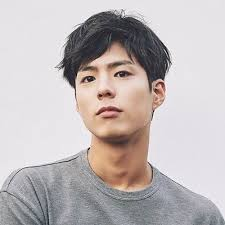

In [45]:
img = bs.find_all('div',class_='y yf')[0].find_all('img',class_='rg_ic rg_i')
img[1]['src']

In [128]:
img_src = []
img_src_url = []
for n in range(len(img)):
    try:
        img_src.append(img[n]['src'])
        img_src_url.append(img[n]['src'])
    except:
        pass
    
    try:
        img_src.append(img[n]['data-src'])
        img_src_url.append(img[n]['data-src'])    
    except:
        pass

''
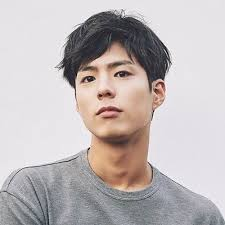

In [129]:
img_src_url[1]

In [131]:
import urllib.request as ur
filename = []
for n in range(10):
    img = ur.urlopen(img_src_url[n]).read()
    filename.append( "{}{}.jpg".format("image",n))
    f = open(filename[n],'wb')
    f.write(img)
    f.close()     

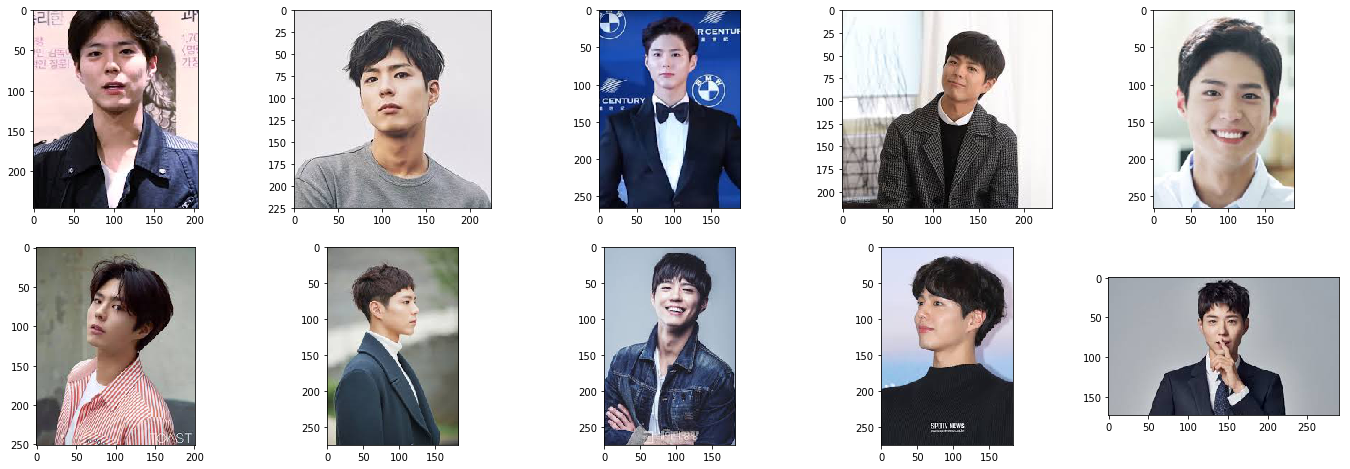

In [134]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 8)
for n in range(2):
    for m in range(5):
          axes[n][m].imshow(Image.open(filename[5*n+m]))

## Q. 네이버에서 '박보검'을 검색하고 사진과 인물정보를 가져와 출력해 보자!